<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/stats548557_gbm_overfitting_ntrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
X, y = fetch_california_housing(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
gbm = GradientBoostingRegressor(max_leaf_nodes=6, learning_rate=0.1, n_estimators=10000, loss='huber')
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=6,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

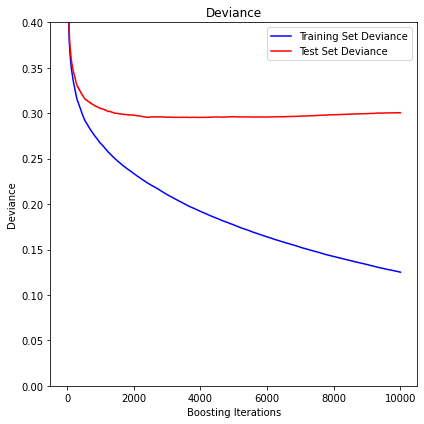

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

model = gbm
n_iter = model.n_estimators_

train_score = np.zeros((n_iter,), dtype=np.float64)
test_score = np.zeros((n_iter,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = mean_absolute_error(y_train, y_pred)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_absolute_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_iter) + 1, train_score, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_iter) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.ylim(0, 0.4)
fig.tight_layout()
plt.show()


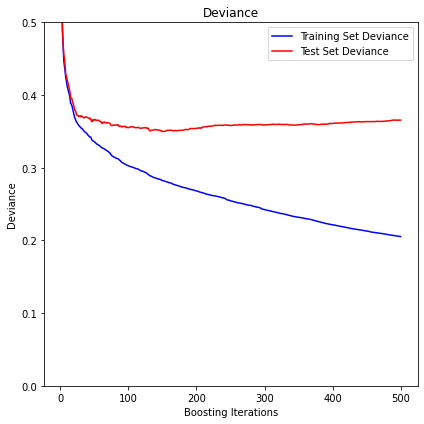

In [29]:
gbm_noshrink = GradientBoostingRegressor(max_leaf_nodes=6, learning_rate=1.0, n_estimators=500)
gbm_noshrink.fit(X_train, y_train)

model = gbm_noshrink

n_iter = model.n_estimators_

train_score = np.zeros((n_iter,), dtype=np.float64)
test_score = np.zeros((n_iter,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = mean_absolute_error(y_train, y_pred)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_absolute_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_iter) + 1, train_score, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_iter) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.ylim(0, 0.5)
fig.tight_layout()
plt.show()



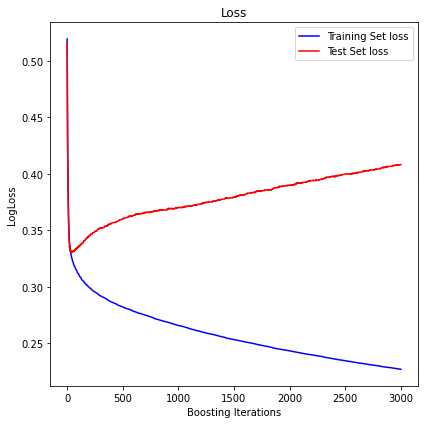

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
X_synth = np.random.rand(1000, 3) * 2 - 1
y_synth = np.sign(np.sign(X_synth[:, 2]) + np.sign(X_synth[:, 0] * X_synth[:, 1]) + 0.01)
# The last feature is easy to track its contribution, but
# the xor nature of the first two features can't be captured 
# by a depth-1 tree.

X_tr, X_te, y_tr, y_te = train_test_split(X_synth, y_synth)

gbc = GradientBoostingClassifier(max_depth=1, n_estimators=3000)
gbc.fit(X_tr, y_tr)

model = gbc
n_iter = model.n_estimators_

from sklearn.metrics import log_loss

train_score = np.zeros((n_iter,), dtype=np.float64)
test_score = np.zeros((n_iter,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict_proba(X_tr)):
    train_score[i] = log_loss(y_tr, y_pred)
for i, y_pred in enumerate(model.staged_predict_proba(X_te)):
    test_score[i] = log_loss(y_te, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Loss')
plt.plot(np.arange(n_iter) + 1, train_score, 'b-',
         label='Training Set loss')
plt.plot(np.arange(n_iter) + 1, test_score, 'r-',
         label='Test Set loss')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('LogLoss')
fig.tight_layout()
plt.show()
